In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df = pd.read_csv("/kaggle/input/hospital-data-in-indonesia/Hospital_Indonesia_datasets.csv", sep=';')

df.head()

/kaggle/input/hospital-data-in-indonesia/Hospital_Indonesia_datasets.csv


,id,nama,propinsi,kab,alamat,jenis,kelas,status_blu,kepemilikan,total_tempat_tidur,total_layanan,total_tenaga_kerja
0,1110053,RS Arun Lhokseumawe,Aceh,Kota Lhokseumawe,Jl. Plaju Komplek Perumahan PT Arun Batuphat T...,Rumah Sakit Umum,C,Non BLU/BLUD,SWASTA/LAINNYA,218,36,328
1,1106014,RS Umum Fandika,Aceh,Aceh Tengah,Jl. Terminal Simpang Wariji Blangkolak 1 Kec. ...,Rumah Sakit Umum,D,Non BLU/BLUD,SWASTA/LAINNYA,45,15,45
2,1171110,RS Umum Daerah Meuraxa,Aceh,Kota Banda Aceh,Jl. Soekarno Hatta Km. 2 Desa Mibo Kecamatan B...,Rumah Sakit Umum,B,BLUD,Pemkot,310,77,487
3,1171163,RS Gigi Mulut Universitas Syiah Kuala,Aceh,Kota Banda Aceh,Jl. Prof A. Madjid Ibrahim I No. 5 Banda Aceh ...,Rumah Sakit Khusus Gigi dan Mulut,B,BLU,Kementerian Lain,11,24,0
4,1102027,RS Umum Daerah Kota Subulussalam,Aceh,Kota Subulussalam,Jl. Hamzah Fansyuri (Subulussalam-Rundeng) K...,Rumah Sakit Umum,C,BLUD,Pemkot,189,34,537


# Data Understanding

In [2]:
#Cek data null
for column in df.columns:
    null_count = df[column].isnull().sum()
    print(f'Jumlah data null untuk kolom {column} adalah: {null_count}')

Jumlah data null untuk kolom id adalah: 0
Jumlah data null untuk kolom nama adalah: 0
Jumlah data null untuk kolom propinsi adalah: 0
Jumlah data null untuk kolom kab adalah: 0
Jumlah data null untuk kolom alamat adalah: 0
Jumlah data null untuk kolom jenis adalah: 0
Jumlah data null untuk kolom kelas adalah: 0
Jumlah data null untuk kolom status_blu adalah: 0
Jumlah data null untuk kolom kepemilikan adalah: 0
Jumlah data null untuk kolom total_tempat_tidur adalah: 0
Jumlah data null untuk kolom total_layanan adalah: 0
Jumlah data null untuk kolom total_tenaga_kerja adalah: 0


In [3]:
#Cek data duplikat
print(f'Jumlah baris duplikat:{df.duplicated().sum()}')

Jumlah baris duplikat:0


In [4]:
#Jumlah baris dan kolom
print(f'Jumlah baris: {df.shape[0]}')
print(f'Jumlah kolom: {df.shape[1]}')

Jumlah baris: 3155
Jumlah kolom: 12


In [5]:
df.columns

Index(['id', 'nama', 'propinsi', 'kab', 'alamat', 'jenis', 'kelas',
       'status_blu', 'kepemilikan', 'total_tempat_tidur', 'total_layanan',
       'total_tenaga_kerja'],
      dtype='object')

In [6]:
#Membuat fungsi untuk summary data
def summary(df):
    summry = pd.DataFrame(df.dtypes, columns=['data type'])
    summry['missing'] = df.isnull().sum().values
    summry['Duplicate'] = df.duplicated().sum()
    summry['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summry['min'] = desc['min'].values
    summry['max'] = desc['max'].values
    summry['avg'] = desc['mean'].values
    summry['std dev'] = desc['std'].values
    summry['top value'] = desc['top'].values
    summry['Freq'] = desc['freq'].values

    return summry

summary(df).style.set_caption("**Summary Data**").\
background_gradient(cmap='Pastel2_r', axis=0). \
set_properties(**{'border': '1.3px dotted', 'color': '', 'caption-side': 'left'})

,data type,missing,Duplicate,#unique,min,max,avg,std dev,top value,Freq
id,int64,0,0,3155,1101015.000000,9271080.000000,3803326.705547,2005302.642676,nan,nan
nama,object,0,0,3091,nan,nan,nan,nan,RS Ibu dan Anak Annisa,4
propinsi,object,0,0,38,nan,nan,nan,nan,Jawa Timur,432
kab,object,0,0,511,nan,nan,nan,nan,Kota Surabaya,64
alamat,object,0,0,3155,nan,nan,nan,nan,"Jl. Plaju Komplek Perumahan PT Arun Batuphat Timur, Kec. Muara Satu",1
jenis,object,0,0,21,nan,nan,nan,nan,Rumah Sakit Umum,2644
kelas,object,0,0,8,nan,nan,nan,nan,C,1710
status_blu,object,0,0,7,nan,nan,nan,nan,Non BLU/BLUD,2335
kepemilikan,object,0,0,22,nan,nan,nan,nan,SWASTA/LAINNYA,869
total_tempat_tidur,int64,0,0,405,0.000000,30343.000000,135.433914,550.960235,nan,nan


# Data Cleaning

In [7]:
#Menampilkan nilai unik untuk kolom jenis 
df['jenis'].unique()

array(['Rumah Sakit Umum', 'Rumah Sakit Khusus Gigi dan Mulut',
       'Rumah Sakit Khusus Ibu dan Anak', 'Rumah Sakit Khusus Jiwa',
       'Rumah Sakit Khusus Bedah', 'Rumah Sakit Khusus Mata',
       'Rumah Sakit Khusus Paru', 'Rumah Sakit Khusus Ginjal',
       'Rumah Sakit Khusus Stroke', 'Rumah Sakit Khusus THT-KL',
       'Rumah Sakit Khusus Kanker', 'Rumah Sakit Khusus Infeksi',
       '021-26071997', 'Rumah Sakit Khusus Jantung',
       'Rumah Sakit Khusus Otak', 'Rumah Sakit Ketergantungan Obat',
       'Rumah Sakit Khusus Orthopedi', 'RS Kapal/Bergerak', '2', ' ', '-'],
      dtype=object)

In [8]:
#Menampilkan nilai unik untuk kolom kelas
df['kelas'].unique()

array(['C', 'D', 'B', 'D PRATAMA', 'A', 'Belum Ditetapkan',
       'Rumah Sakit Umum', 'Rumah Sakit Khusus Jiwa'], dtype=object)

In [9]:
#Menampilkan nilai unik untuk kolom status BLU
df['status_blu'].unique()

array(['Non BLU/BLUD', 'BLUD', 'BLU', 'D', 'A', 'C', 'D PRATAMA'],
      dtype=object)

In [10]:
#Menampilkan nilai unik untuk kolom kepemilikan
df['kepemilikan'].unique()

array(['SWASTA/LAINNYA', 'Pemkot', 'Kementerian Lain', 'Pemkab',
       'Perusahaan', 'Organisasi Sosial', 'POLRI', 'TNI AD', 'TNI AL',
       'BUMN', 'Pemprop', 'Perorangan', 'Organisasi Katholik',
       'Organisasi Protestan', 'Kemkes ', 'TNI AU', 'Organisasi Islam ',
       'Organisasi Budha', 'BLUD', 'BLU', 'Non BLU/BLUD',
       'Organisasi Hindu'], dtype=object)

In [11]:
df[df['kelas'] == 'Rumah Sakit Umum']

,id,nama,propinsi,kab,alamat,jenis,kelas,status_blu,kepemilikan,total_tempat_tidur,total_layanan,total_tenaga_kerja
806,3101002,RS Umum Daerah Kepulauan Seribu,DKI Jakarta,Kepulauan Seribu,"Pulau Pramuka Rt.001 RW.004, Kelurahan : Pulau...",021-26071997,Rumah Sakit Umum,D,BLUD,1966,50,24
1403,3310015,RS Umum Pusat Dr. Soeradji Tirtonegoro,Jawa Tengah,Klaten,"Jl. KRT. Suraji Tirtonegoro No.1, Klaten",2,Rumah Sakit Umum,A,BLU,30343,419,141
3114,9228002,RS Umum Daerah Kawera,Papua,Mamberamo Raya,"Jln. Demianus Kyeuw-kyeuw, SH",-,Rumah Sakit Umum,D PRATAMA,Non BLU/BLUD,1220,50,20


In [12]:
df[df['kelas'] == 'Rumah Sakit Khusus Jiwa']

,id,nama,propinsi,kab,alamat,jenis,kelas,status_blu,kepemilikan,total_tempat_tidur,total_layanan,total_tenaga_kerja
1746,3471085,RS Khusus Jiwa Puri Nirmala,Yogyakarta,Kota Yogyakarta,Jl Jayaningprangan No. 13 Gunungketur Pakualam...,,Rumah Sakit Khusus Jiwa,C,Non BLU/BLUD,1296,27,13


In [13]:
df[df['status_blu'] == 'D']

,id,nama,propinsi,kab,alamat,jenis,kelas,status_blu,kepemilikan,total_tempat_tidur,total_layanan,total_tenaga_kerja
806,3101002,RS Umum Daerah Kepulauan Seribu,DKI Jakarta,Kepulauan Seribu,"Pulau Pramuka Rt.001 RW.004, Kelurahan : Pulau...",021-26071997,Rumah Sakit Umum,D,BLUD,1966,50,24


In [14]:
#Memperbaiki data pada baris ke 8-6, 1403, dan 3114
df.loc[[806, 1403, 3114], 'jenis'] = 'Rumah Sakit Umum'
df.loc[[806, 1403, 3114], 'kelas'] = ['D', 'A', 'D PRATAMA']
df.loc[[806,1403,3114], 'status_blu'] = ['BLUD', 'BLU', 'Non BLU/BLUD']
df.loc[[806,1403,3114], 'kepemilikan'] = 'Tidak diketahui'

In [15]:
#Memperbaiki baris ke 1746
df.loc[[1746], 'jenis'] = 'Rumah Sakit Khusus Jiwa'
df.loc[[1746], 'kelas'] = 'C'
df.loc[[1746], 'status_blu'] = 'Non BLU/BLUD'
df.loc[[1746], 'kepemilikan'] = 'Tidak diketahui'

In [16]:
df.iloc[[1746]]

,id,nama,propinsi,kab,alamat,jenis,kelas,status_blu,kepemilikan,total_tempat_tidur,total_layanan,total_tenaga_kerja
1746,3471085,RS Khusus Jiwa Puri Nirmala,Yogyakarta,Kota Yogyakarta,Jl Jayaningprangan No. 13 Gunungketur Pakualam...,Rumah Sakit Khusus Jiwa,C,Non BLU/BLUD,Tidak diketahui,1296,27,13


# Feature Engineering

In [17]:
# Daftar wilayah berdasarkan provinsi
indonesia_barat = [
    'Aceh', 'Sumatera Utara', 'Sumatera Barat', 'Riau', 'Jambi',
    'Sumatera Selatan', 'Bengkulu', 'Lampung', 'Kepulauan Bangka Belitung',
    'Kepulauan Riau', 'DKI Jakarta', 'Jawa Barat', 'Jawa Tengah',
    'Yogyakarta', 'Jawa Timur', 'Banten', 'Kalimantan Barat',
    'Kalimantan Tengah'
]

indonesia_tengah = [
    'Bali', 'Nusa Tenggara Barat', 'Nusa Tenggara Timur', 'Kalimantan Selatan',
    'Kalimantan Timur', 'Kalimantan Utara', 'Sulawesi Utara', 'Sulawesi Tengah',
    'Sulawesi Selatan', 'Sulawesi Tenggara', 'Gorontalo', 'Sulawesi Barat'
]

indonesia_timur = [
    'Maluku', 'Maluku Utara', 'Papua Barat Daya', 'Papua Barat', 'Papua',
    'Papua Tengah', 'Papua Selatan', 'Papua Pegunungan'
]

# Membuat kategori wilayah
conditions = [
    df['propinsi'].isin(indonesia_barat),
    df['propinsi'].isin(indonesia_tengah),
    df['propinsi'].isin(indonesia_timur)
]

choices = ['Indonesia Barat', 'Indonesia Tengah', 'Indonesia Timur']

# Membuat kolom baru bernama wilayah yang membagi Indonesia Barat, Tengah, dan Timur
df['wilayah'] = np.select(conditions, choices, default='Unknown')

# Cek hasil
df.head()

,id,nama,propinsi,kab,alamat,jenis,kelas,status_blu,kepemilikan,total_tempat_tidur,total_layanan,total_tenaga_kerja,wilayah
0,1110053,RS Arun Lhokseumawe,Aceh,Kota Lhokseumawe,Jl. Plaju Komplek Perumahan PT Arun Batuphat T...,Rumah Sakit Umum,C,Non BLU/BLUD,SWASTA/LAINNYA,218,36,328,Indonesia Barat
1,1106014,RS Umum Fandika,Aceh,Aceh Tengah,Jl. Terminal Simpang Wariji Blangkolak 1 Kec. ...,Rumah Sakit Umum,D,Non BLU/BLUD,SWASTA/LAINNYA,45,15,45,Indonesia Barat
2,1171110,RS Umum Daerah Meuraxa,Aceh,Kota Banda Aceh,Jl. Soekarno Hatta Km. 2 Desa Mibo Kecamatan B...,Rumah Sakit Umum,B,BLUD,Pemkot,310,77,487,Indonesia Barat
3,1171163,RS Gigi Mulut Universitas Syiah Kuala,Aceh,Kota Banda Aceh,Jl. Prof A. Madjid Ibrahim I No. 5 Banda Aceh ...,Rumah Sakit Khusus Gigi dan Mulut,B,BLU,Kementerian Lain,11,24,0,Indonesia Barat
4,1102027,RS Umum Daerah Kota Subulussalam,Aceh,Kota Subulussalam,Jl. Hamzah Fansyuri (Subulussalam-Rundeng) K...,Rumah Sakit Umum,C,BLUD,Pemkot,189,34,537,Indonesia Barat


In [18]:
# Dictionary luas wilayah provinsi (km²)
luas_wilayah = {
    'Aceh': 57365.65, 'Sumatera Utara': 72981.23, 'Sumatera Barat': 42119.54,
    'Riau': 87243.50, 'Jambi': 50160.05, 'Sumatera Selatan': 91592.43,
    'Bengkulu': 19919.33, 'Lampung': 35376.50, 'Kepulauan Bangka Belitung': 16424.14,
    'Kepulauan Riau': 8201.72, 'DKI Jakarta': 664.01, 'Jawa Barat': 35377.76,
    'Jawa Tengah': 32800.69, 'Yogyakarta': 3133.15, 'Jawa Timur': 47799.75,
    'Banten': 9662.92, 'Bali': 5780.06, 'Nusa Tenggara Barat': 20153.15,
    'Nusa Tenggara Timur': 47349.90, 'Kalimantan Barat': 147307.00,
    'Kalimantan Tengah': 153564.50, 'Kalimantan Selatan': 37380.53,
    'Kalimantan Timur': 127346.92, 'Kalimantan Utara': 71817.50,
    'Sulawesi Utara': 13851.64, 'Sulawesi Tengah': 61741.29, 'Sulawesi Selatan': 46717.48,
    'Sulawesi Tenggara': 38067.70, 'Gorontalo': 12747.71, 'Sulawesi Barat': 16987.01,
    'Maluku': 46914.03, 'Maluku Utara': 45732.99, 'Papua Barat Daya': 62709.00,
    'Papua Barat': 103651.00, 'Papua': 317739.00, 'Papua Tengah': 66420.00,
    'Papua Selatan': 117995.00, 'Papua Pegunungan': 108476.00
}


df['luas_wilayah'] = df['propinsi'].map(luas_wilayah)

# Cek hasil
df.head()

,id,nama,propinsi,kab,alamat,jenis,kelas,status_blu,kepemilikan,total_tempat_tidur,total_layanan,total_tenaga_kerja,wilayah,luas_wilayah
0,1110053,RS Arun Lhokseumawe,Aceh,Kota Lhokseumawe,Jl. Plaju Komplek Perumahan PT Arun Batuphat T...,Rumah Sakit Umum,C,Non BLU/BLUD,SWASTA/LAINNYA,218,36,328,Indonesia Barat,57365.65
1,1106014,RS Umum Fandika,Aceh,Aceh Tengah,Jl. Terminal Simpang Wariji Blangkolak 1 Kec. ...,Rumah Sakit Umum,D,Non BLU/BLUD,SWASTA/LAINNYA,45,15,45,Indonesia Barat,57365.65
2,1171110,RS Umum Daerah Meuraxa,Aceh,Kota Banda Aceh,Jl. Soekarno Hatta Km. 2 Desa Mibo Kecamatan B...,Rumah Sakit Umum,B,BLUD,Pemkot,310,77,487,Indonesia Barat,57365.65
3,1171163,RS Gigi Mulut Universitas Syiah Kuala,Aceh,Kota Banda Aceh,Jl. Prof A. Madjid Ibrahim I No. 5 Banda Aceh ...,Rumah Sakit Khusus Gigi dan Mulut,B,BLU,Kementerian Lain,11,24,0,Indonesia Barat,57365.65
4,1102027,RS Umum Daerah Kota Subulussalam,Aceh,Kota Subulussalam,Jl. Hamzah Fansyuri (Subulussalam-Rundeng) K...,Rumah Sakit Umum,C,BLUD,Pemkot,189,34,537,Indonesia Barat,57365.65


In [19]:
#Membuat kolom baru berisi rasio tempat tidur per 1000 penduduk
df['rasio_tempat_tidur'] = df['total_tempat_tidur']/1000

In [20]:
#Membuat kolom kategori berdasarkan area perkotaan dan kabupaten
conditions = [
    df['kab'].str.contains(r'\bKota\b', case=False, na=False) & 
    ~df['kab'].str.contains(r'limapuluh kota', case=False, na=False),  # Mengandung kata 'Kota' kecuali 'limapuluh kota'
    ~df['kab'].str.contains(r'\bKota\b', case=False, na=False) | 
    df['kab'].str.contains(r'limapuluh kota', case=False, na=False)  # Tidak mengandung kata 'Kota' atau mengandung 'limapuluh kota'
]

# Menentukan nilai yang sesuai dengan kondisi
values = ['perkotaan', 'kabupaten']

# Membuat kolom 'area' berdasarkan kondisi
df['area'] = np.select(conditions, values, default='kabupaten')
df.head()

,id,nama,propinsi,kab,alamat,jenis,kelas,status_blu,kepemilikan,total_tempat_tidur,total_layanan,total_tenaga_kerja,wilayah,luas_wilayah,rasio_tempat_tidur,area
0,1110053,RS Arun Lhokseumawe,Aceh,Kota Lhokseumawe,Jl. Plaju Komplek Perumahan PT Arun Batuphat T...,Rumah Sakit Umum,C,Non BLU/BLUD,SWASTA/LAINNYA,218,36,328,Indonesia Barat,57365.65,0.218,perkotaan
1,1106014,RS Umum Fandika,Aceh,Aceh Tengah,Jl. Terminal Simpang Wariji Blangkolak 1 Kec. ...,Rumah Sakit Umum,D,Non BLU/BLUD,SWASTA/LAINNYA,45,15,45,Indonesia Barat,57365.65,0.045,kabupaten
2,1171110,RS Umum Daerah Meuraxa,Aceh,Kota Banda Aceh,Jl. Soekarno Hatta Km. 2 Desa Mibo Kecamatan B...,Rumah Sakit Umum,B,BLUD,Pemkot,310,77,487,Indonesia Barat,57365.65,0.310,perkotaan
3,1171163,RS Gigi Mulut Universitas Syiah Kuala,Aceh,Kota Banda Aceh,Jl. Prof A. Madjid Ibrahim I No. 5 Banda Aceh ...,Rumah Sakit Khusus Gigi dan Mulut,B,BLU,Kementerian Lain,11,24,0,Indonesia Barat,57365.65,0.011,perkotaan
4,1102027,RS Umum Daerah Kota Subulussalam,Aceh,Kota Subulussalam,Jl. Hamzah Fansyuri (Subulussalam-Rundeng) K...,Rumah Sakit Umum,C,BLUD,Pemkot,189,34,537,Indonesia Barat,57365.65,0.189,perkotaan


# Exploratory Data Analysis (EDA)

In [21]:
#Import library untuk EDA
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sns.set_theme()

In [102]:
#Membuat fungsi untuk memvisualisasikan data numerik
def plot(df, column):
    fig, axs = plt.subplots(1,2, figsize=(12,5))
    sns.histplot(data=df, x=column, ax=axs[0])
    axs[0].set_title(f'Distribusi {column} Menggunakan Histogram')

    sns.boxplot(data=df, y=column, ax=axs[1])
    axs[1].set_title(f'Distribusi {column} Menggunakan Boxplot')

    fig.tight_layout()
    plt.show()

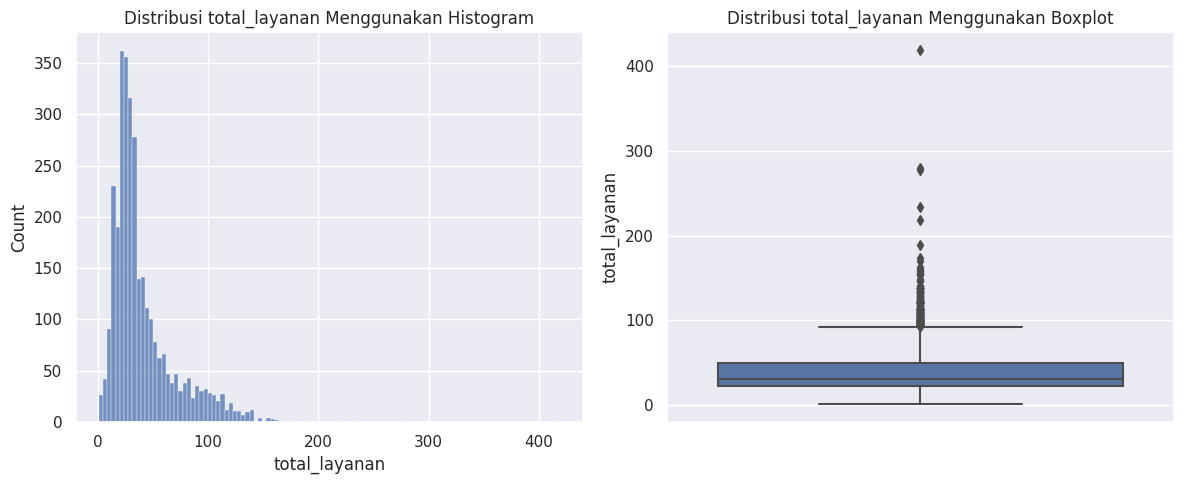

In [23]:
plot(df, 'total_layanan')

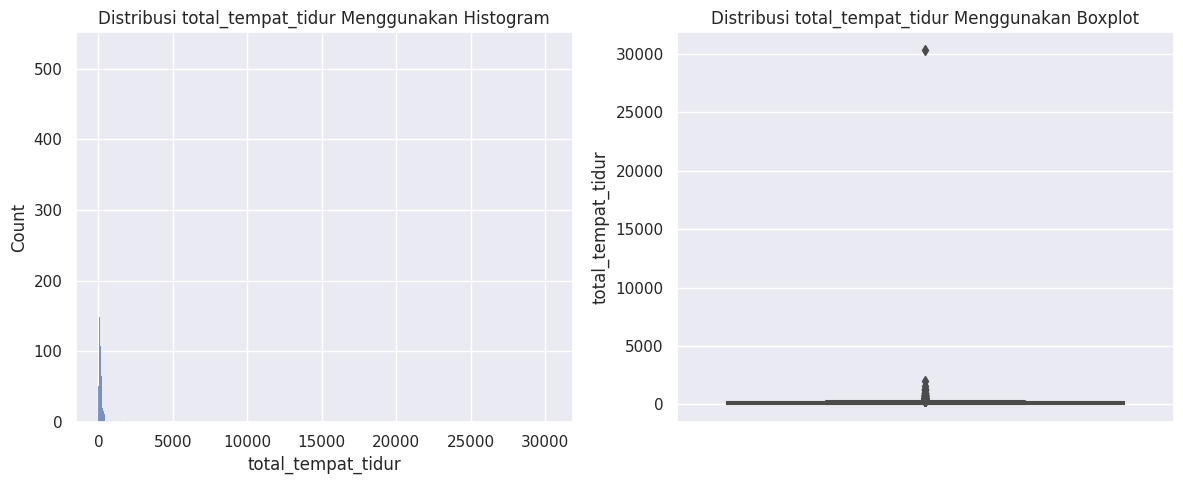

In [24]:
plot(df, 'total_tempat_tidur')

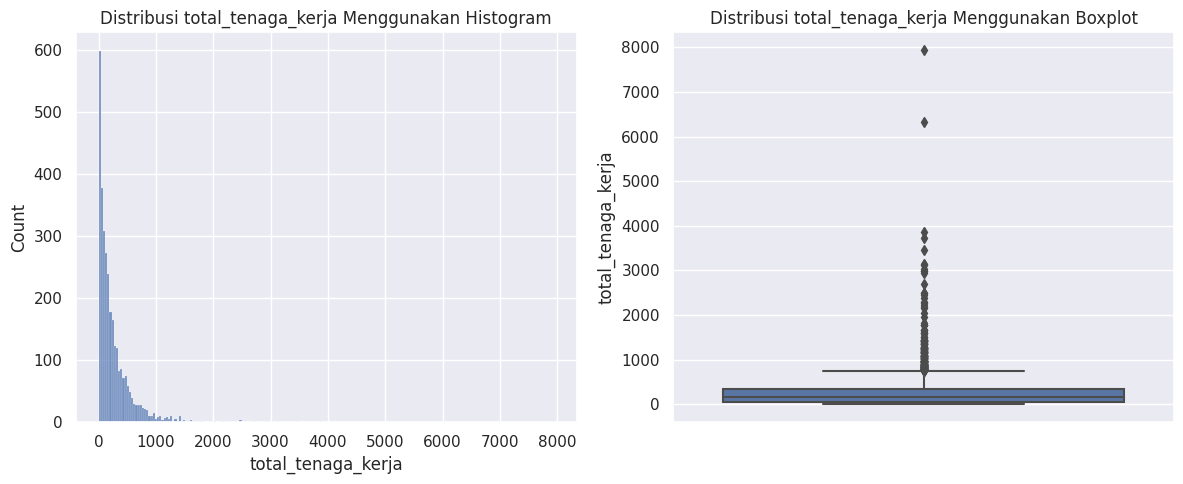

In [25]:
plot(df, 'total_tenaga_kerja')

In [26]:
#Menghitung jumlah RS berdasarkan nama
jumlah_rs = df.groupby("nama").size().reset_index(name='Jumlah').sort_values(by='Jumlah', ascending=False)
jumlah_rs

,nama,Jumlah
381,RS Ibu dan Anak Annisa,4
2721,RS Umum Permata Bunda,4
526,RS Ibu dan Anak Mutiara Bunda,4
2725,RS Umum Permata Hati,4
550,RS Ibu dan Anak Permata Hati,4
...,...,...
1039,RS Pratama Kab. Pohuwatu,1
1040,RS Pratama Kabupaten Landak,1
1041,RS Pratama Kota Yogyakarta,1
1042,RS Pratama Krayan,1


In [27]:
#Mengecek ada berapa banyak nama RS yang digunakan lebih dari sekali
jumlah_rs[jumlah_rs['Jumlah'] > 1].count()

nama      48
Jumlah    48
dtype: int64

In [28]:
df[df['nama'] == 'RS Ibu dan Anak Annisa']

,id,nama,propinsi,kab,alamat,jenis,kelas,status_blu,kepemilikan,total_tempat_tidur,total_layanan,total_tenaga_kerja,wilayah,luas_wilayah,rasio_tempat_tidur,area
393,1471386,RS Ibu dan Anak Annisa,Riau,Kota Pekanbaru,Jl Garuda No.66 Kel.Tangkerang Tengah Kec.Marp...,Rumah Sakit Khusus Ibu dan Anak,C,Non BLU/BLUD,Perusahaan,27,14,43,Indonesia Barat,87243.50,0.027,perkotaan
471,1571161,RS Ibu dan Anak Annisa,Jambi,Kota Jambi,Jl. Kabia No.4 RT. 01 Kebun Handil,Rumah Sakit Khusus Ibu dan Anak,C,Non BLU/BLUD,Perusahaan,73,26,117,Indonesia Barat,50160.05,0.073,perkotaan
1612,3301095,RS Ibu dan Anak Annisa,Jawa Tengah,Cilacap,Jl. Gatot Subroto 31 A Cilacap,Rumah Sakit Khusus Ibu dan Anak,C,Non BLU/BLUD,Organisasi Islam,24,17,43,Indonesia Barat,32800.69,0.024,kabupaten
2628,6371155,RS Ibu dan Anak Annisa,Kalimantan Selatan,Kota Banjarmasin,Jl Jafri Zamzam No 56 RT 33 Banjarmasin,Rumah Sakit Khusus Ibu dan Anak,C,Non BLU/BLUD,SWASTA/LAINNYA,33,17,100,Indonesia Tengah,37380.53,0.033,perkotaan


In [29]:
df[df['nama'] ==  "RS Umum Permata Bunda"]

,id,nama,propinsi,kab,alamat,jenis,kelas,status_blu,kepemilikan,total_tempat_tidur,total_layanan,total_tenaga_kerja,wilayah,luas_wilayah,rasio_tempat_tidur,area
964,3207045,RS Umum Permata Bunda,Jawa Barat,Ciamis,Jl. Mr. Iwa Kusumasomantri No.1 Ciamis,Rumah Sakit Umum,D,Non BLU/BLUD,Organisasi Sosial,78,26,30,Indonesia Barat,35377.76,0.078,kabupaten
1250,3278082,RS Umum Permata Bunda,Jawa Barat,Kota Tasikmalaya,Jl. HR. Wasita Kusumah No. 1 Indihiang Kota Ta...,Rumah Sakit Umum,C,Non BLU/BLUD,SWASTA/LAINNYA,100,35,46,Indonesia Barat,35377.76,0.100,perkotaan
1870,3573249,RS Umum Permata Bunda,Jawa Timur,Kota Malang,Jl. Soekarno Hatta No. 75 Malang,Rumah Sakit Umum,D,Non BLU/BLUD,Perusahaan,50,39,169,Indonesia Barat,47799.75,0.050,perkotaan
2030,3524050,RS Umum Permata Bunda,Jawa Timur,Lamongan,Jl. Petro No. 20 Plaosan Kecamatan Babat Kabup...,Rumah Sakit Umum,D,BLU,SWASTA/LAINNYA,51,19,58,Indonesia Barat,47799.75,0.051,kabupaten


In [30]:
#def hitung_jumlah(df, group_by_col, count_col='id'):
    #return (
        #df.groupby(group_by_col)[count_col]
        #.count()
        #.reset_index(name='Jumlah')
        #.sort_values(by='Jumlah', ascending=False)
    #)

#Membuat fungsi untuk memvisualisasikan jumlah rumah sakit
def jumlah_rs(df, column):
    data = (df.groupby(column)['id'].size().reset_index(name='Jumlah RS').sort_values(by='Jumlah RS', ascending=False))
    if data[column].nunique() > 40:
        data = data.head(10)

    # Buat plot
    plt.figure(figsize=(12,6))
    ax = sns.barplot(x='Jumlah RS', y=column, data=data, palette='viridis')
    for index, value in enumerate(data['Jumlah RS']):
        plt.text(value + 0.5, index, str(value), va='center')

    plt.xlabel("Jumlah")
    plt.ylabel("Propinsi")
    plt.title(f'Jumlah RS berdasarkan {column}')
    plt.show()

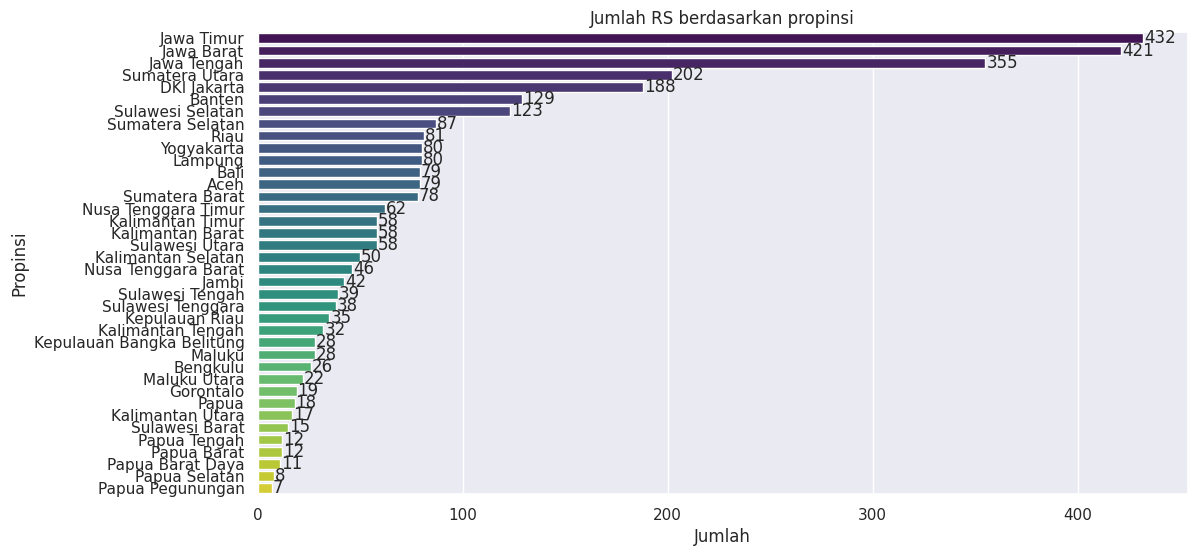

In [31]:
jumlah_rs(df, 'propinsi')

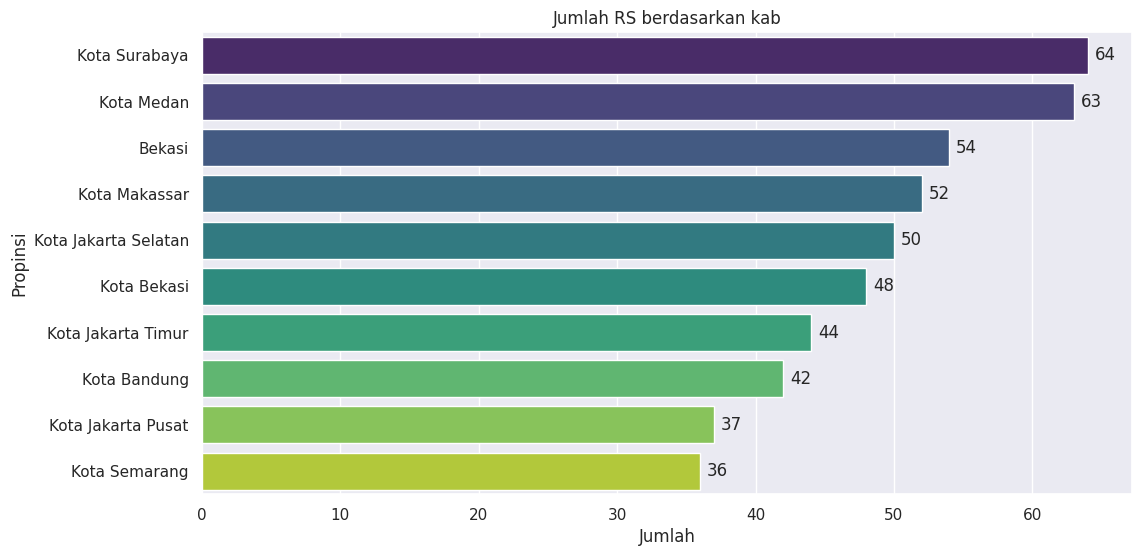

In [32]:
jumlah_rs(df, 'kab')

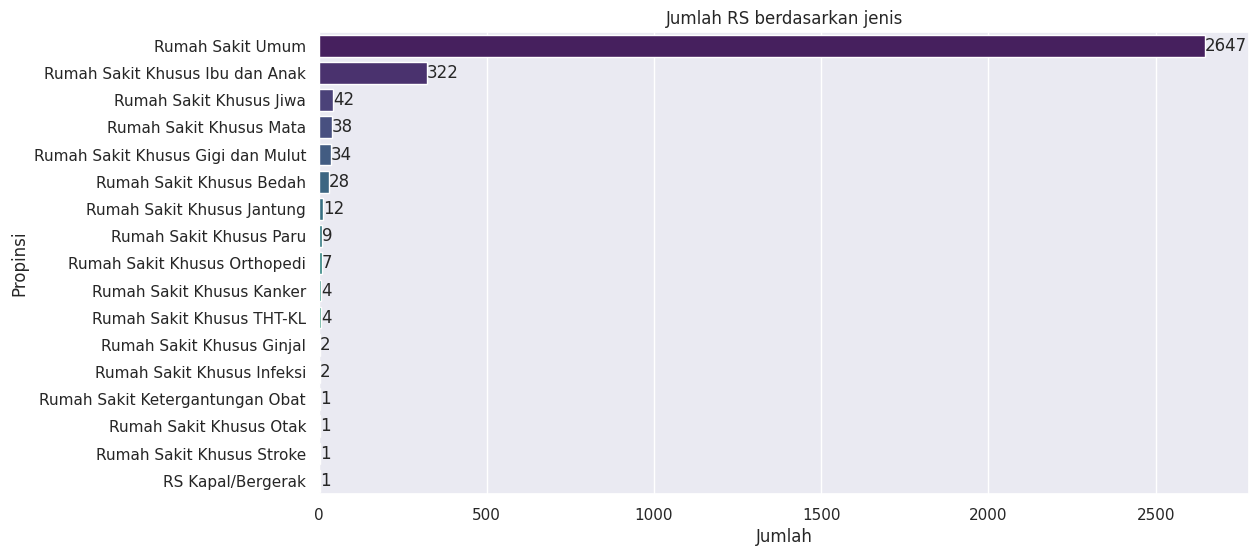

In [33]:
jumlah_rs(df, 'jenis')

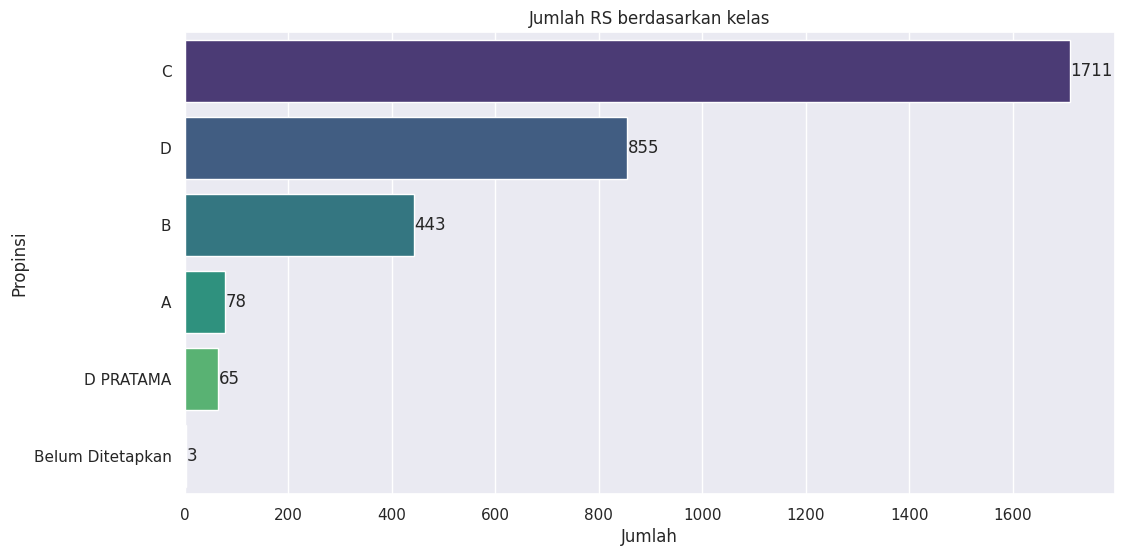

In [34]:
jumlah_rs(df, 'kelas')

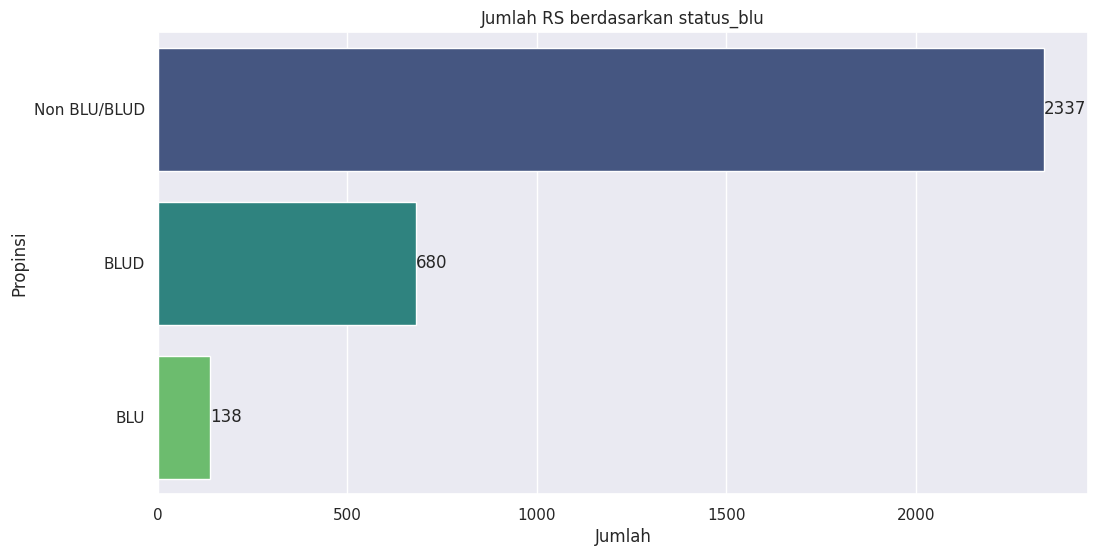

In [35]:
jumlah_rs(df, 'status_blu')

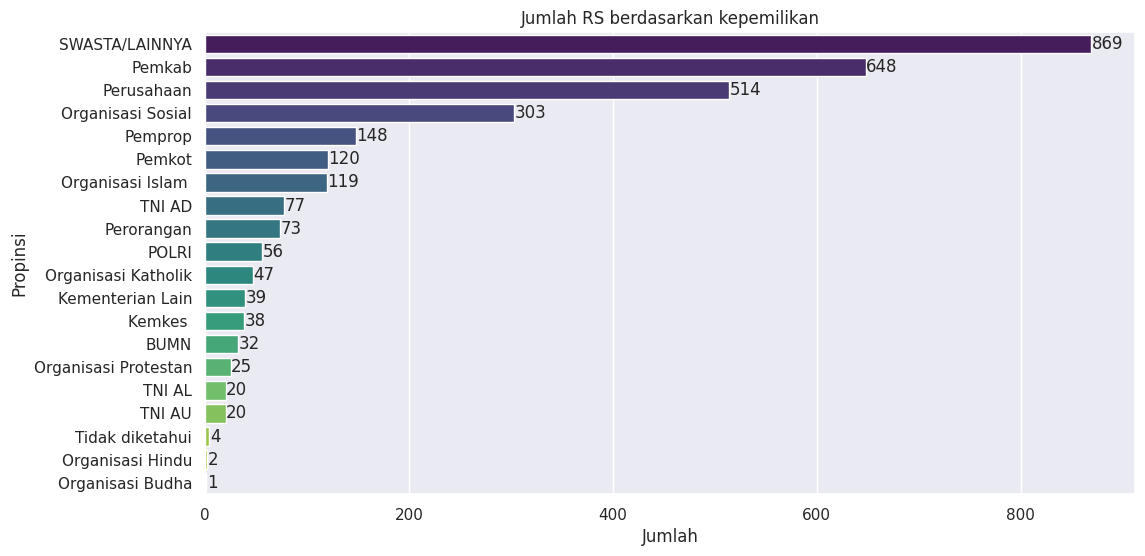

In [36]:
jumlah_rs(df, 'kepemilikan')

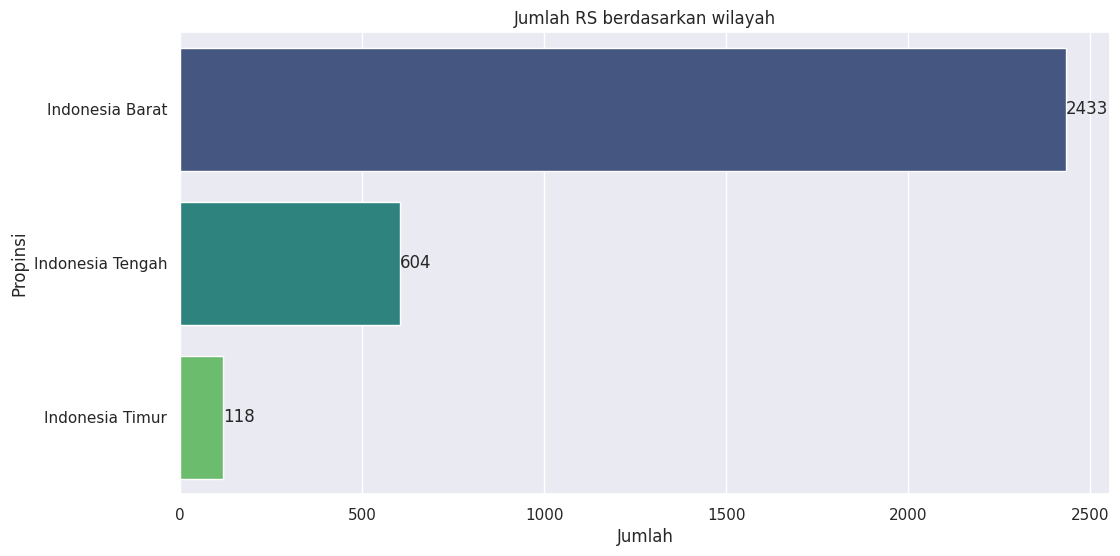

In [37]:
jumlah_rs(df, 'wilayah')

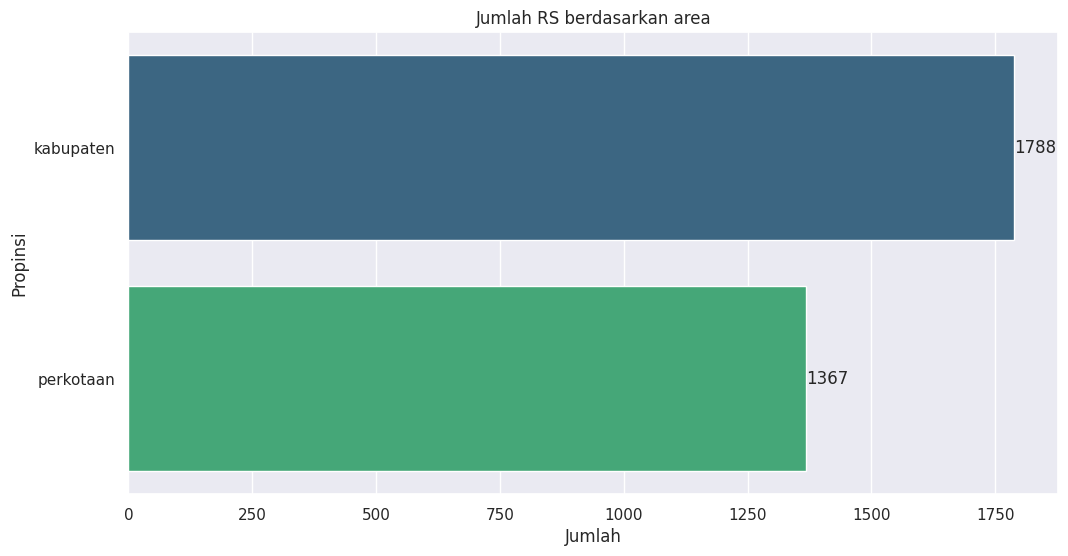

In [38]:
jumlah_rs(df, 'area')

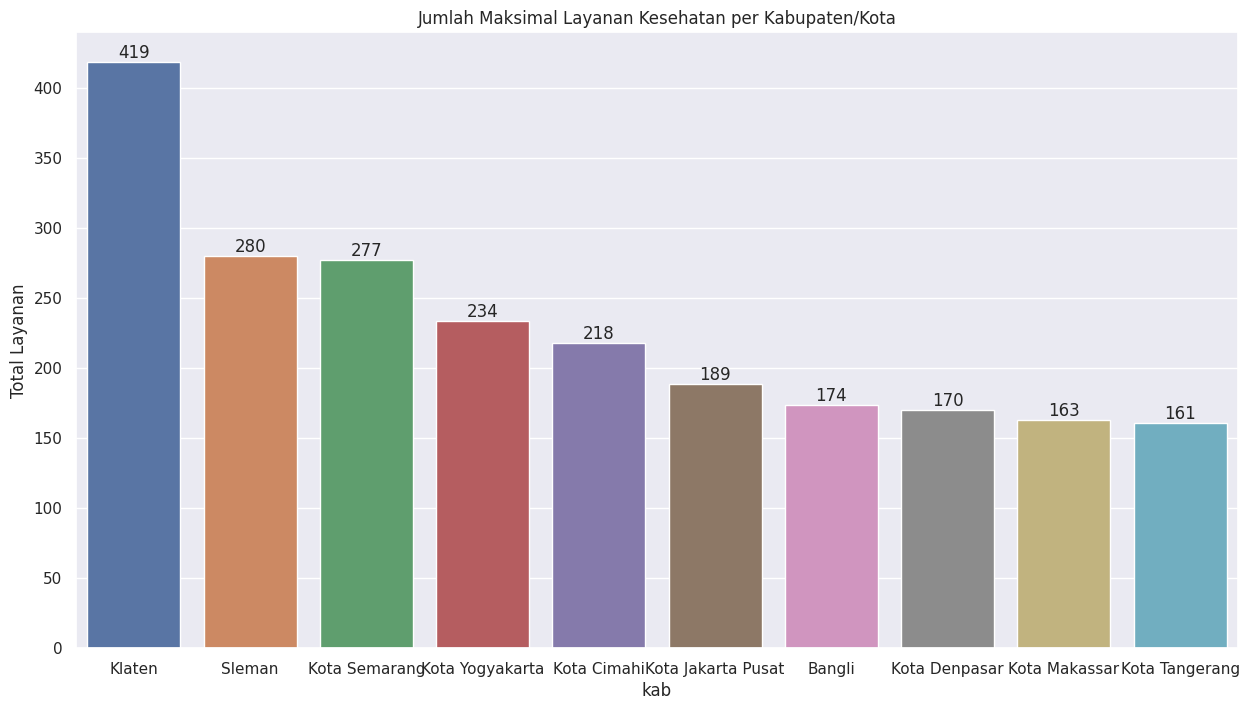

In [39]:
#Mengumpulkan data jumlah pelayanan terbanyak masing-masing kabupaten/kota
total_layanan = df.groupby('kab')['total_layanan'].max().reset_index(name='Total Layanan').sort_values(by='Total Layanan', ascending=False)

#Membuat visualisasinya
plt.figure(figsize=(15,8))
ax = sns.barplot(x=total_layanan['kab'].head(10), y=total_layanan['Total Layanan'].head(10))
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12)
plt.title("Jumlah Maksimal Layanan Kesehatan per Kabupaten/Kota")
plt.show()

In [40]:
tempat_tidur = df.groupby('kab')['total_tempat_tidur'].sum().reset_index().sort_values(by='total_tempat_tidur', ascending=False)
tempat_tidur['tempat_tidur_per_1000'] = tempat_tidur['total_tempat_tidur']/1000
tempat_tidur.head(20)

,kab,total_tempat_tidur,tempat_tidur_per_1000
161,Klaten,31941,31.941
253,Kota Surabaya,9438,9.438
218,Kota Medan,8556,8.556
201,Kota Jakarta Timur,7237,7.237
214,Kota Makassar,7052,7.052
174,Kota Bandung,6827,6.827
43,Bekasi,6413,6.413
200,Kota Jakarta Selatan,6155,6.155
199,Kota Jakarta Pusat,6024,6.024
244,Kota Semarang,5883,5.883


In [41]:
#Menghitung jumlah tempat tidur tiap provinsi
prov = df.groupby('propinsi')['total_tempat_tidur'].sum().reset_index()

#Menenntukan luas wilayah tiap provinsi
penduduk = df.groupby('propinsi')['luas_wilayah'].median().reset_index()

#Menggabungkan data jumlah tempat tidur dan luas wilayah per provinsi
prov_penduduk = pd.merge(prov, penduduk, how='inner', on='propinsi')
prov_penduduk.head(10)

,propinsi,total_tempat_tidur,luas_wilayah
0,Aceh,11030,57365.65
1,Bali,9203,5780.06
2,Banten,15846,9662.92
3,Bengkulu,2735,19919.33
4,DKI Jakarta,30357,664.01
5,Gorontalo,2400,12747.71
6,Jambi,4585,50160.05
7,Jawa Barat,59802,35377.76
8,Jawa Tengah,77753,32800.69
9,Jawa Timur,52252,47799.75


In [84]:
#Menghitung rata-rata jumlah layanan RS tiap provinsi
layanan = df.groupby('propinsi')['total_layanan'].mean().reset_index()

#Menggabungkan data
pend_layanan = pd.merge(penduduk, layanan, how='inner', on='propinsi')
pend_layanan.head()

,propinsi,luas_wilayah,total_layanan
0,Aceh,57365.65,35.860759
1,Bali,5780.06,50.607595
2,Banten,9662.92,45.674419
3,Bengkulu,19919.33,32.769231
4,DKI Jakarta,664.01,57.760638


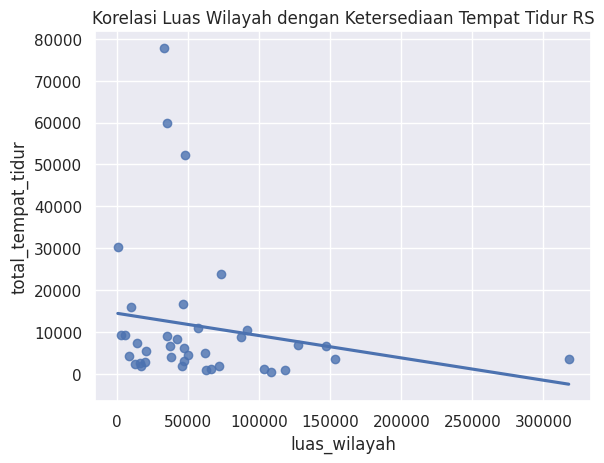

In [42]:
#Visualisasi korelasi antara luas wilayah dengan ketersediaan tempat tidur RS
sns.regplot(data=prov_penduduk, x='luas_wilayah', y='total_tempat_tidur', ci=None)
plt.title("Korelasi Luas Wilayah dengan Ketersediaan Tempat Tidur RS")
plt.show()

In [43]:
korelasi = prov_penduduk['total_tempat_tidur'].corr(prov_penduduk['luas_wilayah'])
print('Korelasi Ketersediaan Tempat Tidur dan Luas Wilayah:', round(korelasi, 4))

Korelasi Ketersediaan Tempat Tidur dan Luas Wilayah: -0.1848


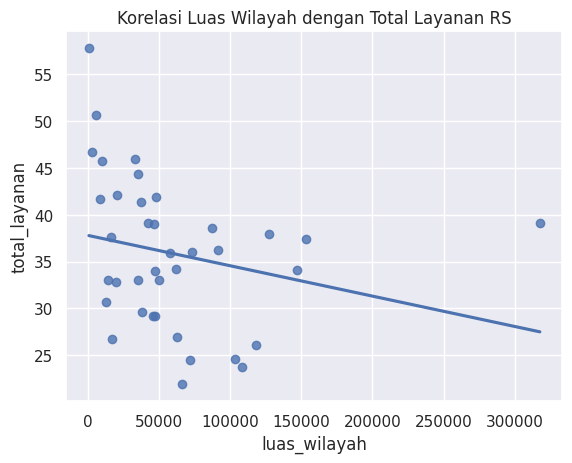

In [88]:
#Visualisasi korelasi antara luas wilayah dengan total layanan RS
sns.regplot(data=pend_layanan, x='luas_wilayah', y='total_layanan', ci=None)
plt.title("Korelasi Luas Wilayah dengan Total Layanan RS")
plt.show()

In [87]:
korelasi = pend_layanan['total_layanan'].corr(pend_layanan['luas_wilayah'])
print('Korelasi Total Layanan dan Luas Wilayah:', round(korelasi, 4))

Korelasi Total Layanan dan Luas Wilayah: -0.2397


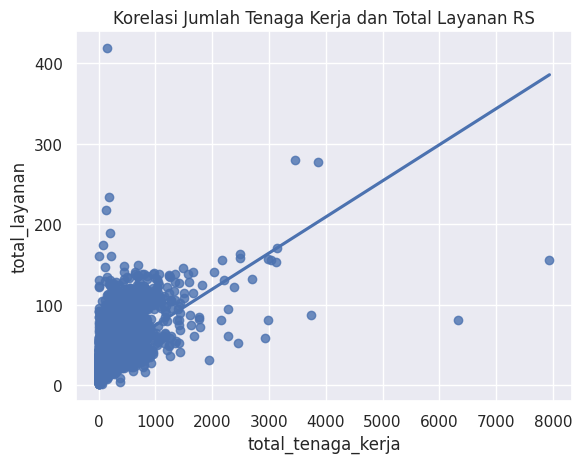

In [44]:
#Visualisasi korelasi antara jumlah tenaga kerja dengan total layanan RS
sns.regplot(df, x='total_tenaga_kerja', y='total_layanan', ci=None)
plt.title("Korelasi Jumlah Tenaga Kerja dan Total Layanan RS")
plt.show()

In [45]:
korelasi = df['total_tenaga_kerja'].corr(df['total_layanan'])
print('Korelasi Total Tenaga Kerja dan Total Layanan:', round(korelasi, 4))

Korelasi Total Tenaga Kerja dan Total Layanan: 0.5616


In [46]:
#Menampilkan kelas RS terbanyak pada tiap wilayah Indonesia
df.groupby('wilayah')['kelas'].agg(lambda x: x.mode()[0]).reset_index()

,wilayah,kelas
0,Indonesia Barat,C
1,Indonesia Tengah,C
2,Indonesia Timur,D


In [47]:
#Menampilkan status kepemilikan terbanyak tiap wilayah Indonesia
df.groupby('wilayah')['kepemilikan'].agg(lambda x: x.mode()[0]).reset_index()

,wilayah,kepemilikan
0,Indonesia Barat,SWASTA/LAINNYA
1,Indonesia Tengah,Pemkab
2,Indonesia Timur,Pemkab


In [103]:
#Menampilkan status kepemilikan terbanyak tiap provinsi
df.groupby('propinsi')['kepemilikan'].agg(lambda x: x.mode()[0]).reset_index().head()

,propinsi,kepemilikan
0,Aceh,Pemkab
1,Bali,SWASTA/LAINNYA
2,Banten,SWASTA/LAINNYA
3,Bengkulu,Pemkab
4,DKI Jakarta,SWASTA/LAINNYA


In [49]:
#Menampilkan status kepemilikan terbanyak tiap kelas RS
df.groupby('kelas')['kepemilikan'].agg(lambda x: x.mode()[0]).reset_index()

,kelas,kepemilikan
0,A,Kemkes
1,B,Pemkab
2,Belum Ditetapkan,Pemkab
3,C,SWASTA/LAINNYA
4,D,SWASTA/LAINNYA
5,D PRATAMA,Pemkab


In [50]:
#Menampilkan area mana yang didominasi oleh tiap kelas RS
df.groupby('kelas')['area'].agg(lambda x: x.mode()[0]).reset_index()

,kelas,area
0,A,perkotaan
1,B,perkotaan
2,Belum Ditetapkan,kabupaten
3,C,kabupaten
4,D,kabupaten
5,D PRATAMA,kabupaten


In [51]:
#Membuat fungsi untuk menghitung rata-rata berdasarkan kelompok tertentu
def rata_rata(df, cat, val):
    avg =  df.groupby(cat)[val].mean().reset_index()
    plt.figure(figsize=(10,6))
    ax = sns.barplot(x=cat, y=val, data=avg, palette='viridis')
    for p in ax.patches:
        ax.annotate(f'{p.get_height():,.2f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=12)
    plt.xlabel(cat)
    plt.ylabel(f'Rata-rata {val}')
    plt.title(f'Rata-rata {val} per {cat}')
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

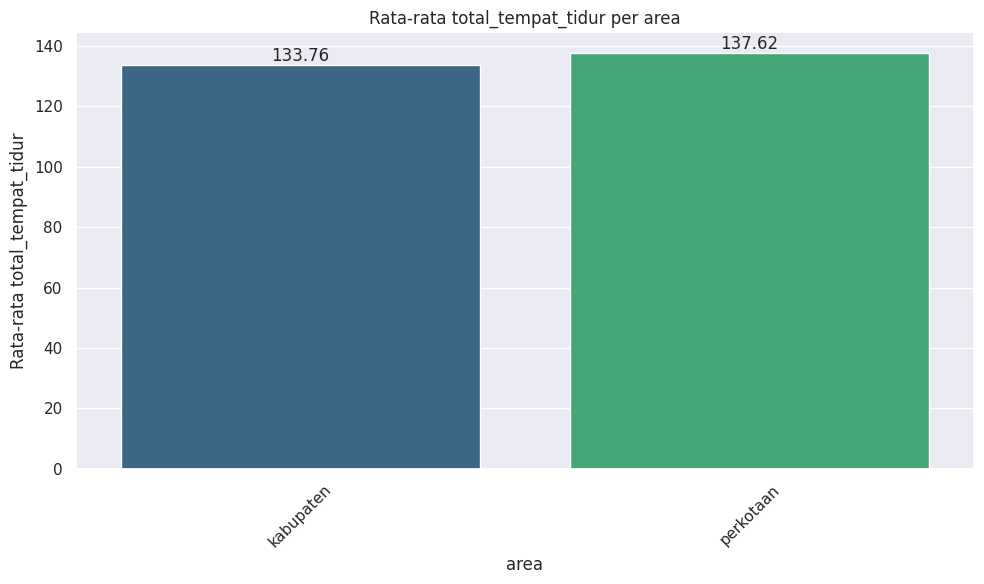

In [52]:
rata_rata(df, 'area', 'total_tempat_tidur')

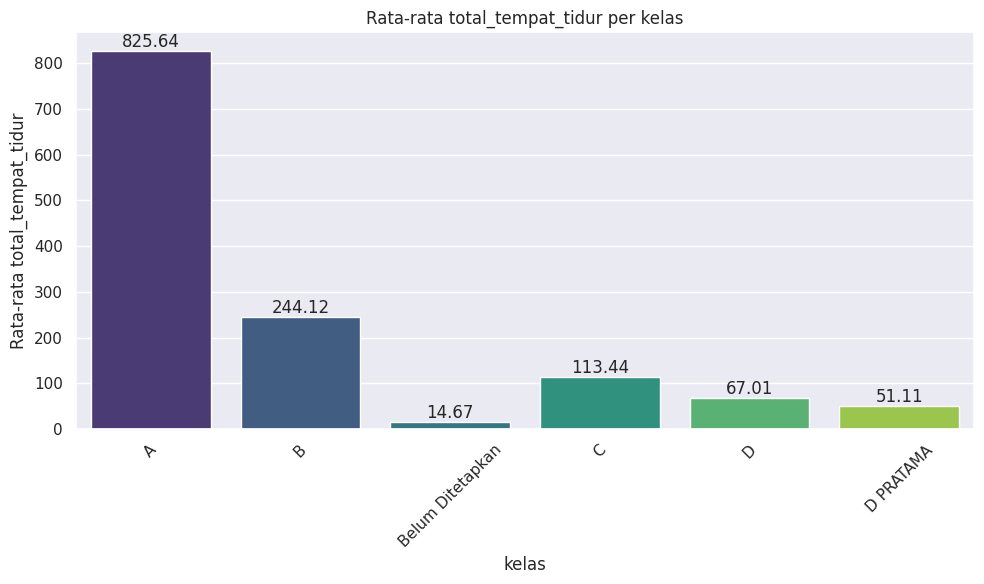

In [53]:
rata_rata(df, 'kelas', 'total_tempat_tidur')

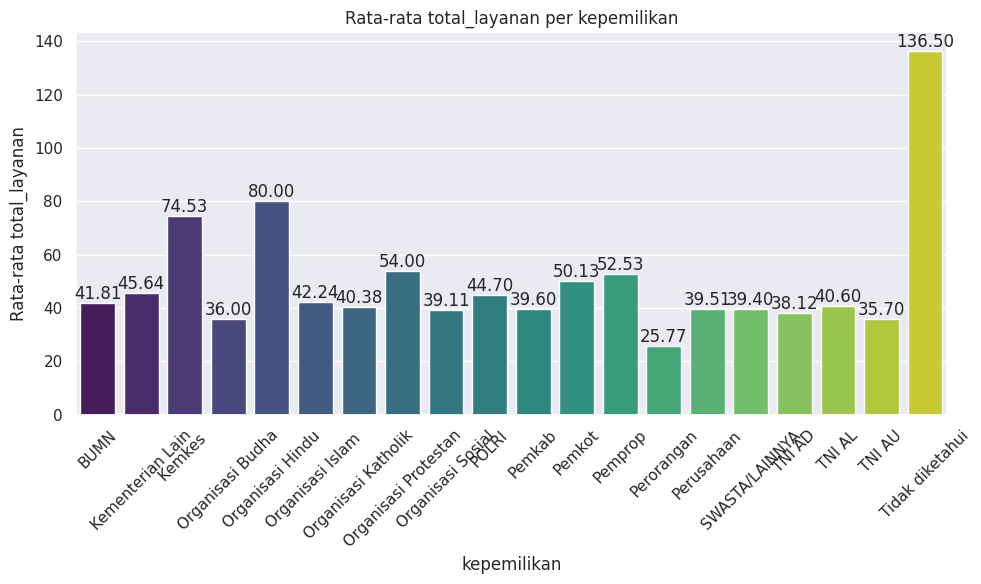

In [54]:
rata_rata(df, 'kepemilikan', 'total_layanan')

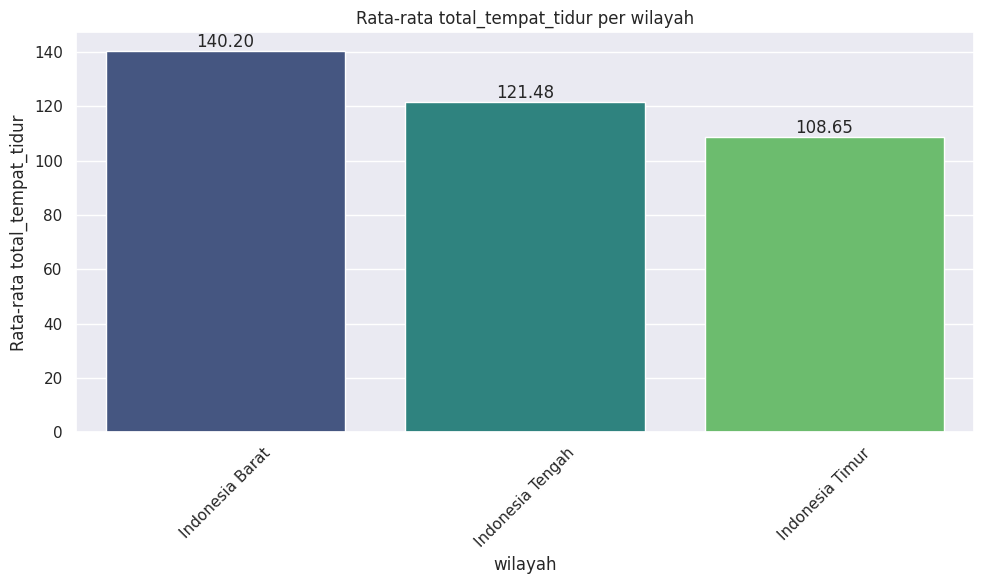

In [55]:
rata_rata(df, 'wilayah', 'total_tempat_tidur')

In [56]:
df[:1]

,id,nama,propinsi,kab,alamat,jenis,kelas,status_blu,kepemilikan,total_tempat_tidur,total_layanan,total_tenaga_kerja,wilayah,luas_wilayah,rasio_tempat_tidur,area
0,1110053,RS Arun Lhokseumawe,Aceh,Kota Lhokseumawe,Jl. Plaju Komplek Perumahan PT Arun Batuphat T...,Rumah Sakit Umum,C,Non BLU/BLUD,SWASTA/LAINNYA,218,36,328,Indonesia Barat,57365.65,0.218,perkotaan


# Analisis Statistik

## Raw Data

In [57]:
import scipy.stats as stats

#Membuat fungsi untuk menguji signifikansi antar dua kelompok
def t_test(group1, group2, nama1='Grup1', nama2='Grup2', alpha=0.05):
    # Melakukan uji t independen
    t_stat, p_value = stats.ttest_ind(group1, group2)

    # Menampilkan hasil uji t
    print(f"Nilai t-statistik: {t_stat}")
    print(f"Nilai p: {p_value}")

    # Menentukan apakah ada perbedaan signifikan
    if p_value < alpha:
        print(f'Hasil: Ada perbedaan yang signifikan antara {nama1} dengan {nama2}')
    else:
        print(f'Hasil: Tidak ada perbedaan yang signifikan antara {nama1} dengan {nama2}')

In [58]:
#Mengumpulkan data masing-masing wilayah
indo_barat = df[df['wilayah'] == 'Indonesia Barat']['total_layanan']
indo_tengah = df[df['wilayah'] == 'Indonesia Tengah']['total_layanan']
indo_timur = df[df['wilayah'] == 'Indonesia Timur']['total_layanan']

#Menerapkan fungsi untuk Indonesia Barat dan Indonesia Timur
t_test(indo_barat, indo_timur, nama1='Indonesia Barat', nama2='Indonesia Timur')

Nilai t-statistik: 4.354855298289784
Nilai p: 1.3841430362273479e-05
Hasil: Ada perbedaan yang signifikan antara Indonesia Barat dengan Indonesia Timur


In [59]:
#Menerapkan fungsi untuk Indonesia Barat dan Indonesia Tengah
t_test(indo_barat, indo_tengah, nama1='Indonesia Barat', nama2='Indonesia Tengah')

Nilai t-statistik: 3.684661727864343
Nilai p: 0.00023300731824853384
Hasil: Ada perbedaan yang signifikan antara Indonesia Barat dengan Indonesia Tengah


In [60]:
#Mengumpulkan data untuk daerah perkotaan dan kabupaten
daerah_kota = df[df['area'] == 'perkotaan']['total_layanan']
daerah_kab =  df[df['area'] == 'kabupaten']['total_layanan']

#Menguji perbedaan
t_test(daerah_kota, daerah_kab, nama1='Perkotaan', nama2='Daerah Kabupaten')

Nilai t-statistik: 9.924868760500038
Nilai p: 7.001969489856341e-23
Hasil: Ada perbedaan yang signifikan antara Perkotaan dengan Daerah Kabupaten


In [61]:
#Membuat fungsi ANOVA untuk menguji perbedaan signifikansi antar kategori
def anova_test(df, category_column, value_column, alpha=0.05):
    # Mengelompokkan data berdasarkan kategori
    grouped_data = [df[df[category_column] == category][value_column] for category in df[category_column].unique()]
    
    # Melakukan uji ANOVA satu arah
    f_stat, p_value = stats.f_oneway(*grouped_data)

    # Menampilkan hasil uji ANOVA
    print(f"Nilai F-statistik: {f_stat}")
    print(f"Nilai p: {p_value}")

    # Menentukan apakah ada perbedaan signifikan
    if p_value < alpha:
        print(f"Hasil: Ada perbedaan yang signifikan antara kategori-kategori tersebut")
    else:
        print(f"Hasil: Tidak ada perbedaan yang signifikan antara kategori-kategori tersebut")

In [62]:
# Menjalankan uji ANOVA berdasarkan kepemilikan RS
anova_test(df, 'kepemilikan', 'total_layanan')

Nilai F-statistik: 8.333699725913572
Nilai p: 2.488715404263444e-23
Hasil: Ada perbedaan yang signifikan antara kategori-kategori tersebut


In [63]:
# Menjalankan uji ANOVA berdasarkan kelas RS
anova_test(df, 'kelas', 'total_tempat_tidur')

Nilai F-statistik: 33.04376370703378
Nilai p: 5.7498540062098066e-33
Hasil: Ada perbedaan yang signifikan antara kategori-kategori tersebut


In [104]:
import scipy.stats as stats

# Membuat fungsi korelasi dua variabel dengan t-statistik
def corr(df, var1, var2):
    n = len(df)
    kor, p_value = stats.pearsonr(df[var1], df[var2])

    t_stat = kor * np.sqrt((n - 2) / (1 - kor**2)) # t statistik

    print(f"Koefisien Korelasi antara {var1} dan {var2}: {kor}")
    print(f"t-Statistik: {t_stat}")
    print(f"Nilai p: {p_value}")

    if p_value < 0.05:
        print(f"Ada korelasi signifikan antara {var1} dan {var2}")
    else:
        print(f"Tidak ada korelasi signifikan antara {var1} dan {var2}")

In [105]:
#Korelasi total tempat tidur dan total layanan
corr(df, 'total_tempat_tidur', 'total_layanan')

Koefisien Korelasi antara total_tempat_tidur dan total_layanan: 0.33793070726044316
t-Statistik: 20.161419641960382
Nilai p: 3.976863960508372e-85
Ada korelasi signifikan antara total_tempat_tidur dan total_layanan


In [106]:
#Korelasi luas wilayah dan total layanan
corr(pend_layanan, 'luas_wilayah', 'total_layanan')

Koefisien Korelasi antara luas_wilayah dan total_layanan: -0.2397178161557104
t-Statistik: -1.4815036811959421
Nilai p: 0.1471730691220162
Tidak ada korelasi signifikan antara luas_wilayah dan total_layanan


In [107]:
#Korelasi luas wilayah dan total layanan
corr(prov_penduduk, 'luas_wilayah', 'total_tempat_tidur')

Koefisien Korelasi antara luas_wilayah dan total_tempat_tidur: -0.18484506248047367
t-Statistik: -1.1285173527588785
Nilai p: 0.26656615986725635
Tidak ada korelasi signifikan antara luas_wilayah dan total_tempat_tidur


# Rangkuman Analisis

In [108]:
rangkuman = pd.DataFrame(columns=
                         ['Pramater Yang Diuji', 't-statistik', 'p value', 'Kesimpulan'])

rangkuman.loc[0] = ['Layanan Kesehatan Indonesia Barat vs Timur', round(4.354855298289784, 4), round(1.3841430362273479e-05, 4), 
                    'Ada perbedaan signifikan']
rangkuman.loc[1] = ['Layanan Kesehatan Indonesia Barat vs Tengah', round(3.684661727864343, 4), round(0.00023300731824853384, 4), 
                    'Ada perbedaan signifikan']
rangkuman.loc[2] = ['Layanan Kesehatan Menurut Kepemilikan RS', round(9.924868760500038, 4), round(2.488715404263444e-237, 4), 
                    'Ada perbedaan signifikan']
rangkuman.loc[3] = ['Layanan Kesehatan Perkotaan dan Daerah Kabupaten', round(8.333699725913572, 4), round(7.001969489856341e-23, 4), 
                    'Ada perbedaan signifikan']
rangkuman.loc[4] = ['Layanan Kesehatan Menurut Kelas RS', round(33.04376370703378, 4), round(5.7498540062098066e-33, 4), 
                    'Ada perbedaan signifikan']
rangkuman

,Pramater Yang Diuji,t-statistik,p value,Kesimpulan
0,Layanan Kesehatan Indonesia Barat vs Timur,4.3549,0.0000,Ada perbedaan signifikan
1,Layanan Kesehatan Indonesia Barat vs Tengah,3.6847,0.0002,Ada perbedaan signifikan
2,Layanan Kesehatan Menurut Kepemilikan RS,9.9249,0.0000,Ada perbedaan signifikan
3,Layanan Kesehatan Perkotaan dan Daerah Kabupaten,8.3337,0.0000,Ada perbedaan signifikan
4,Layanan Kesehatan Menurut Kelas RS,33.0438,0.0000,Ada perbedaan signifikan


# Kesimpulan

Berdasarkan data fasilitas rumah sakit di Indonesia yang telah dianalisis, berikut beberapa poin kesimpulan:  

1. **Distribusi Rumah Sakit**  
   - Terdapat ketimpangan fasilitas kesehatan di Indonesia baik ditinjau dari wilayah, area, kepemilikan, dan kelas rumah sakit.
   - Rumah sakit tersebar di seluruh Indonesia, tetapi jumlahnya lebih banyak di provinsi dengan populasi tinggi seperti Jawa Barat, Jawa Timur, dan DKI Jakarta. Selain itu, semakin ke timur jumlah layanan RS semakin sedikit  
   - Beberapa daerah dengan populasi lebih sedikit memiliki keterbatasan akses ke rumah sakit.  

2. **Jenis dan Kepemilikan Rumah Sakit**  
   - Rumah sakit umum lebih dominan dibandingkan rumah sakit khusus.  
   - Mayoritas rumah sakit dimiliki oleh pemerintah dan swasta, dengan rumah sakit milik BUMN dan TNI/Polri dalam jumlah yang lebih sedikit.  

3. **Ketersediaan Fasilitas dan Kelas Rumah Sakit**  
   - Rumah sakit dengan kelas tertinggi (kelas A) lebih terkonsentrasi di kota-kota besar.  
   - Sebagian besar rumah sakit berada dalam kategori kelas C dan D, yang umumnya memiliki fasilitas lebih terbatas.   

# Rekomendasi

   - Perlu adanya pemerataan fasilitas kesehatan, terutama di daerah yang masih memiliki sedikit rumah sakit seperti Indonesia bagian timur.  
   - Peningkatan jumlah rumah sakit kelas A atau B di luar Pulau Jawa dapat meningkatkan akses layanan kesehatan berkualitas.  
   - Perluasan rumah sakit berbasis BLU atau swasta dapat menjadi solusi untuk meningkatkan layanan tanpa membebani anggaran pemerintah secara langsung. 